In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [20]:
feature_name = ['Alchol','Malic','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution','Proline']

In [2]:
df = pd.read_csv('C://Users//Dell//Downloads//Excel R//Assignments//Machine Learning//Unsupervised//PCA//wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [4]:
X = df.iloc[:,1:]
X
y = df.iloc[:,0]
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaled = scaler.fit_transform(X_train,X_test)

In [8]:
scaled

array([[ 1.66529275, -0.60840587,  1.21896194, ..., -1.65632857,
        -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502, ..., -0.58463272,
        -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, ...,  0.35845962,
         0.2462267 , -0.24860607],
       ...,
       [ 1.714239  , -0.44172441,  0.06884503, ...,  1.04434496,
         0.56585166,  2.69572196],
       [-0.35374006, -0.7399965 , -0.36244882, ...,  0.01551695,
        -0.74044166, -0.79631083],
       [-0.78201975,  0.06709269,  0.35637426, ..., -0.67036839,
         1.09392769, -0.98551793]])

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)

In [32]:
pca.fit(scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
x_pca = pca.transform(scaled)

In [34]:
x_pca.shape

(142, 3)

In [35]:
scaled.shape

(142, 13)

Text(0, 0.5, '2nd PC')

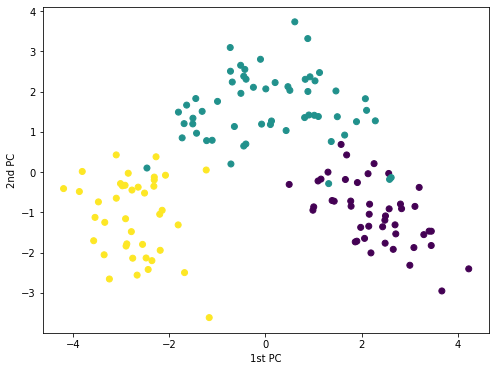

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train)
plt.xlabel('1st PC')
plt.ylabel('2nd PC')

In [37]:
pca.components_

array([[ 0.12753249, -0.25623655, -0.02236181, -0.24428137,  0.14757757,
         0.38490786,  0.41950095, -0.2992598 ,  0.30843734, -0.11907301,
         0.29949964,  0.38381622,  0.27587548],
       [-0.4928047 , -0.1904464 , -0.31676447,  0.03513857, -0.26217161,
        -0.09601687, -0.01513129, -0.07626286, -0.0738558 , -0.53396728,
         0.28133315,  0.14274046, -0.381054  ],
       [-0.18514872,  0.1424076 ,  0.60965837,  0.59527663,  0.0663528 ,
         0.17680473,  0.18174944,  0.20274722,  0.15058799, -0.12401015,
         0.07300682,  0.21392593, -0.1430069 ]])

In [38]:
xprinc = pd.DataFrame(pca.components_,columns=feature_name)

In [39]:
xprinc

,Alchol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.127532,-0.256237,-0.022362,-0.244281,0.147578,0.384908,0.419501,-0.299260,0.308437,-0.119073,0.299500,0.383816,0.275875
1,-0.492805,-0.190446,-0.316764,0.035139,-0.262172,-0.096017,-0.015131,-0.076263,-0.073856,-0.533967,0.281333,0.142740,-0.381054
2,-0.185149,0.142408,0.609658,0.595277,0.066353,0.176805,0.181749,0.202747,0.150588,-0.124010,0.073007,0.213926,-0.143007


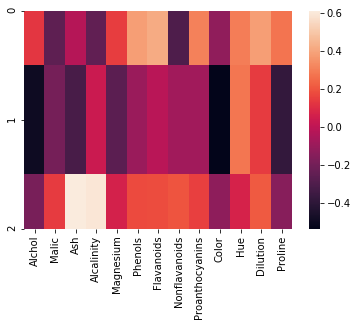

In [40]:
sn.heatmap(xprinc)